In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy

In [91]:
#function for Fvalues
potential_e = 0.01
potential_mu = -0.01
def Fvv_values(p_1, p_2, p_3, p_4):
    f1 = f(p_1, potential_e)
    g1 = g(p_1, potential_mu)
    f2 = f(p_2, potential_e)
    g2 = g(p_2, potential_mu)
    f3 = f(p_3, potential_e)
    g3 = g(p_3, potential_mu)
    f4 = f(p_4, potential_e)
    g4 = g(p_4, potential_mu)
    
    T1 = 2*f3*f4*(1-f2)*(1-f1) + f3*g4*(1-g2)*(1-f1) + 2*g3*g4*(1-g2)*(1-g1) + g3*f4*(1-f2)*(1-g1)
    T2 = 2*(1-f3)*(1-f4)*f2*f1 + (1-f3)*(1-g4)*g2*f1 + 2*(1-g3)*(1-g4)*g2*g1 + (1-g3)*(1-f4)*f2*g1
    
    return T1-T2

def Fvvbar_values(p_1, p_2, p_3, p_4):
    f1 = f(p_1, potential_e)
    g1 = g(p_1, potential_mu)
    f2 = f(p_2, -potential_e)
    g2 = g(p_2, -potential_mu)
    f3 = f(p_3, -potential_e)
    g3 = g(p_3, -potential_mu)
    f4 = f(p_4, potential_e)
    g4 = g(p_4, potential_mu)
    
    T1a = 2*(1-f1)*f4*f3*(1-f2) + (1-f1)*f4*g3*(1-g2) + 2*(1-g1)*g4*g3*(1-g2) + (1-g1)*g4*f3*(1-f2)
    T1b = 2*(1-f1)*(1-f2)*f3*f4 + (1-f1)*(1-f2)*g3*g4 + 2*(1-g1)*(1-g2)*g3*g4 + (1-g1)*(1-g2)*f3*f4
    
    T2a = 2*f1*(1-f4)*(1-f3)*f2 + f1*(1-f4)*(1-g3)*g2 + 2*g1*(1-g4)*(1-g3)*g2 + g1*(1-g4)*(1-f3)*f2
    T2b = 2*f1*f2*(1-f3)*(1-f4) + f1*f2*(1-g3)*(1-g4) + 2*g1*g2*(1-g3)*(1-g4) + g1*g2*(1-f3)*(1-f4)
    
    return T1a+T1b-(T2a+T2b)

In [57]:
#function for J1, J2, J3
def J1(p1, p2, p3):
    return 16./15 * p3**3 * (10 * (p1+p2)**2 - 15 * (p1+p2) * p3 + 6 * p3**2)

def J2(p1, p2):
    return 16./15 * p2**3 * (10 * p1**2 + 5 * p1*p2 + p2**2)
    
def J3(p1, p2, p3):
    return 16./15 * ((p1+p2)**5 - 10 * (p1+p2)**2 * p3**3 + 15 * (p1+p2) * p3**4 - 6 * p3**5)

def K1(p1, p3):
    return 16./15 * p3**3 * (10 * p1**2 -  5* p1 * p3 + p3**2)

def K2(p1, p2, p3):
    return 16./15 * p2**3 * (10 * (p1-p3)**2 + 15 * (p1-p3) * p2 + 6 * p2**2)

def K3(p1, p2, p3):
    return 16./15 * ((p1-p3)**2 * p2**3 + 15 * (p1-p3) * p2**4 + 6 * p2**5)

In [9]:
def f(energy, potential):
    return 1 / (math.exp(energy + potential) + 1)
    
    
def g(energy, potential):
    return 1 / (math.exp(energy + potential)+1)

In [15]:
def inner_integral(p1, p2):
    sum = 0
    
    length = 10000
    values = np.zeros(length)

    p3_vals = np.linspace(xmin, eps[p2]+eps[p1], length)
    if(p2<p1):
        for p3 in range(length):
            if(eps[p1]+eps[p2]-p3_vals[p3]>=0):

                if(p3<p2):
                    values[p3] = Fvv_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * J1(eps[p1], eps[p2], p3_vals[p3]) + Fvvbar_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * K1(eps[p1], p3_vals[p3])
                elif(p3<p1):
                    values[p3] = Fvv_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * J2(eps[p1], eps[p2]) + Fvvbar_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * K2(eps[p1], eps[p2], p3_vals[p3])
                else:
                    values[p3] = Fvv_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * J3(eps[p1], eps[p2], p3_vals[p3]) + Fvvbar_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * K3(eps[p1], eps[p2], p3_vals[p3])
                    
    else:
        for p3 in range(length):
            if(eps[p1]+eps[p2]-p3_vals[p3]>=0):
                if(p3<p1):
                    values[p3] = Fvv_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * J1(eps[p1], eps[p2], p3_vals[p3]) + Fvvbar_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * K1(eps[p1], p3_vals[p3])
                elif(p3<p2):
                    values[p3] = Fvv_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * J2(eps[p2], eps[p1]) + Fvvbar_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * K1(p3_vals[p3], eps[p1])
                else:
                    values[p3] = Fvv_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * J3(eps[p1], eps[p2], p3_vals[p3]) + Fvvbar_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * K3(eps[p1], eps[p2], p3_vals[p3])

    return p3_vals, values, scipy.integrate.trapezoid(values, p3_vals)

In [59]:
xmin = 0
xmax = 20
numlin = 201
p1 = 50

eps = np.linspace(xmin, xmax, numlin)

In [60]:
eps[p1]

5.0

In [99]:
results = np.zeros(60)
p3_vals = np.zeros(60)
results2 = np.zeros(60)
for i in range(60):
    p3_vals[i] = eps[i]
    results[i] = Fvv_values(eps[50], eps[10], eps[i], eps[50+10-i])
    results2[i] = Fvvbar_values(eps[50], eps[10], eps[i], eps[50+10-i])
    
    
fake_term_1 = [0.0107733, 0.0113086, 0.0118406, 0.0123666, 0.012884 , 0.0133904,
       0.0138835, 0.0143612, 0.0148218, 0.0152635, 0.0156853, 0.016086 ,
       0.0164648, 0.0168212, 0.0171549, 0.0174658, 0.0177538, 0.0180193,
       0.0182624, 0.0184836, 0.0186833, 0.018862 , 0.0190202, 0.0191584,
       0.0192771, 0.0193767, 0.0194576, 0.0195202, 0.0195647, 0.0195913,
       0.0196002, 0.0195913, 0.0195647, 0.0195202, 0.0194576, 0.0193767,
       0.0192771, 0.0191585, 0.0190203, 0.0188621, 0.0186834, 0.0184837,
       0.0182625, 0.0180194, 0.0177539, 0.0174659, 0.017155 , 0.0168213,
       0.0164649, 0.0160861, 0.0156854, 0.0152637, 0.0148219, 0.0143614,
       0.0138836, 0.0133906, 0.0128842, 0.0123667, 0.0118407, 0.0113087]

fake_term_2 = [0.0107735, 0.0113087, 0.0118407, 0.0123667, 0.0128842, 0.0133905,
       0.0138836, 0.0143613, 0.0148218, 0.0152636, 0.0156853, 0.0160859,
       0.0164647, 0.0168211, 0.0171548, 0.0174657, 0.0177537, 0.0180192,
       0.0182623, 0.0184835, 0.0186831, 0.0188618, 0.01902  , 0.0191582,
       0.0192769, 0.0193765, 0.0194574, 0.01952  , 0.0195645, 0.0195911,
       0.0195999, 0.0195911, 0.0195645, 0.01952  , 0.0194574, 0.0193765,
       0.0192769, 0.0191582, 0.0190201, 0.0188619, 0.0186832, 0.0184835,
       0.0182623, 0.0180192, 0.0177538, 0.0174658, 0.0171549, 0.0168212,
       0.0164648, 0.016086 , 0.0156854, 0.0152637, 0.0148219, 0.0143614,
       0.0138837, 0.0133907, 0.0128843, 0.0123669, 0.0118409, 0.0113089]

other_stuff = [-1.73472e-18, -8.67362e-19, -4.33681e-18, -2.60209e-18,
       -2.60209e-18, -8.67362e-19, -6.07153e-18, -6.07153e-18,
       -2.60209e-18, -4.33681e-18,  1.73472e-18, -8.67362e-18,
       -8.67362e-18, -3.46945e-18, -3.46945e-18,  0.00000e+00,
       -3.46945e-18, -3.46945e-18, -5.20417e-18, -8.67362e-18,
       -1.73472e-18, -5.20417e-18, -3.46945e-18, -5.20417e-18,
       -1.04083e-17, -1.73472e-18, -6.93889e-18, -5.20417e-18,
       -8.67362e-18, -5.20417e-18, -1.73472e-18, -5.20417e-18,
       -8.67362e-18, -6.93889e-18, -6.93889e-18, -1.73472e-18,
       -8.67362e-18, -5.20417e-18, -5.20417e-18, -3.46945e-18,
        0.00000e+00, -1.04083e-17, -5.20417e-18, -5.20417e-18,
       -3.46945e-18, -3.46945e-18, -6.93889e-18, -5.20417e-18,
       -1.04083e-17, -6.93889e-18,  1.73472e-18, -6.07153e-18,
       -5.20417e-18, -6.07153e-18, -4.33681e-18, -8.67362e-19,
       -3.46945e-18, -2.60209e-18, -4.33681e-18, -8.67362e-19]

more_other_stuff = [-3.46945e-18, -3.46945e-18, -1.04083e-17, -3.46945e-18,
       -6.93889e-18,  0.00000e+00, -6.93889e-18, -8.67362e-18,
       -5.20417e-18, -1.04083e-17,  0.00000e+00, -1.04083e-17,
       -2.08167e-17, -6.93889e-18, -1.38778e-17, -6.93889e-18,
       -6.93889e-18, -1.04083e-17, -6.93889e-18, -1.38778e-17,
       -6.93889e-18, -6.93889e-18, -3.46945e-18, -1.38778e-17,
       -1.38778e-17, -3.46945e-18, -1.38778e-17, -1.38778e-17,
       -1.38778e-17, -6.93889e-18,  0.00000e+00, -6.93889e-18,
       -1.38778e-17, -6.93889e-18, -1.38778e-17, -6.93889e-18,
       -2.08167e-17, -1.04083e-17, -6.93889e-18,  0.00000e+00,
       -6.93889e-18, -1.73472e-17, -3.46945e-18, -6.93889e-18,
       -6.93889e-18, -3.46945e-18, -1.04083e-17, -1.04083e-17,
       -1.73472e-17, -6.93889e-18,  3.46945e-18, -8.67362e-18,
       -6.93889e-18, -1.04083e-17, -5.20417e-18,  0.00000e+00,
       -5.20417e-18, -3.46945e-18, -8.67362e-18,  0.00000e+00]

In [100]:
fake_terms = np.zeros(len(fake_term_1))
for i in range(len(fake_term_1)):
    fake_terms[i] = fake_term_1[i]-fake_term_2[i]

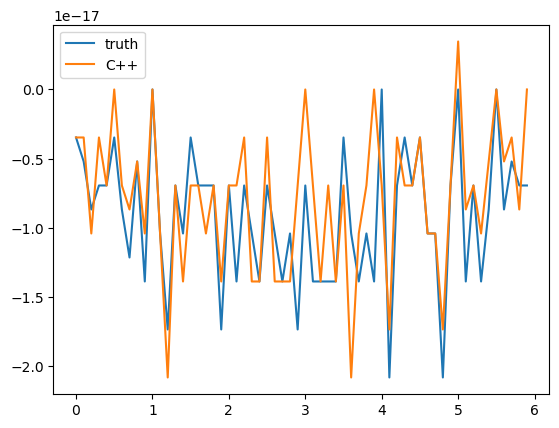

In [101]:
plt.figure()
plt.plot(p3_vals, results2, label="truth")
#plt.plot(p3_vals, fake_terms, label="C++")
plt.plot(p3_vals, more_other_stuff, label="C++")
#plt.plot(p3_vals, fake_results, label="C++")
plt.legend()
plt.show()

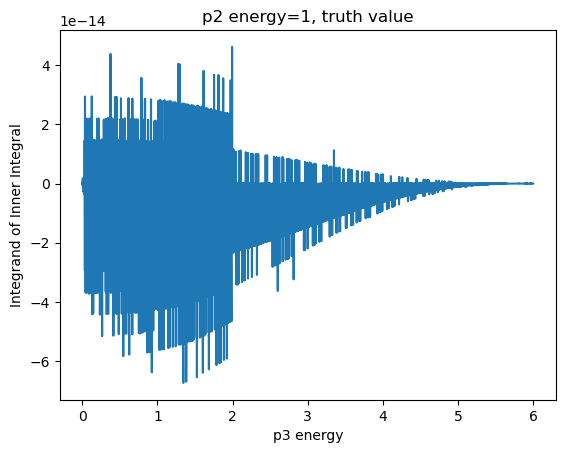

In [28]:
p3s, vals, result = inner_integral(p1,10)
plt.figure()
plt.plot(p3s, vals)
plt.xlabel("p3 energy")
plt.ylabel("Integrand of Inner Integral")
plt.title("p2 energy=1, truth value")
plt.show()

In [22]:
p3s_fake = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6]

In [23]:
vals_fake = [-1.62925e-07, -1.52383e-07, -1.40157e-07, -1.26356e-07, -1.11117e-07, -9.46074e-08, -7.70147e-08, -5.85426e-08, -3.94048e-08, -1.98188e-08, 3.46945e-18, 1.98429e-08, 3.95127e-08, 5.88264e-08, 7.76182e-08, 9.57405e-08, 1.13065e-07, 1.29481e-07, 1.44897e-07, 1.59238e-07, 1.72446e-07, 1.84472e-07, 1.95283e-07, 2.04853e-07, 2.13165e-07, 2.20208e-07, 2.25974e-07, 2.30461e-07, 2.33666e-07, 2.3559e-07, 2.36231e-07, 2.3559e-07, 2.33666e-07, 2.30461e-07, 2.25974e-07, 2.20208e-07, 2.13165e-07, 2.04853e-07, 1.95283e-07, 1.84472e-07, 1.72446e-07, 1.59238e-07, 1.44897e-07, 1.29481e-07, 1.13065e-07, 9.57405e-08, 7.76182e-08, 5.88264e-08, 3.95127e-08, 1.98429e-08, 3.46945e-18, -1.98188e-08, -3.94048e-08, -5.85426e-08, -7.70147e-08, -9.46074e-08, -1.11117e-07, -1.26356e-07, -1.40157e-07, -1.52383e-07, 0]

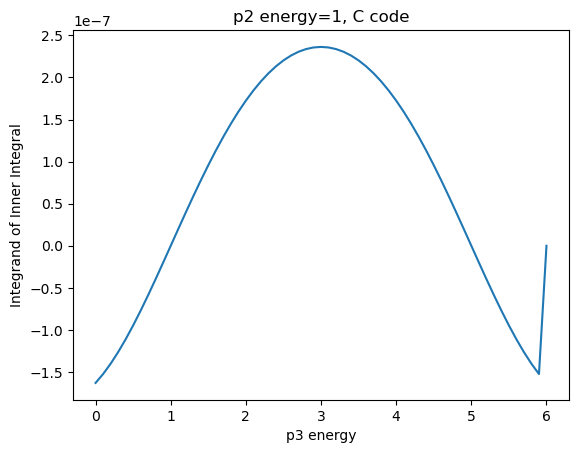

In [29]:
plt.figure()
plt.plot(p3s_fake, vals_fake)
plt.xlabel("p3 energy")
plt.ylabel("Integrand of Inner Integral")
plt.title("p2 energy=1, C code")
plt.show()

In [11]:
eps[p1]

5.0

In [12]:
results = np.zeros(numlin)
for i in range(numlin):
    results[i] = inner_integral(p1, i)

ValueError: setting an array element with a sequence.

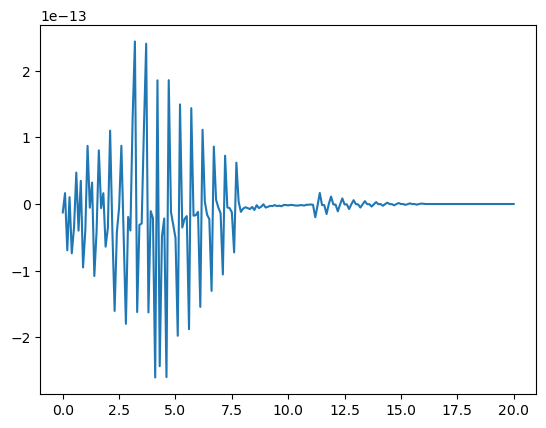

In [13]:
plt.figure()
plt.plot(eps, results)
plt.show()

In [14]:
p2=200

length = 100
values = np.zeros(length)

p3_vals = np.linspace(xmin, eps[p2]+eps[p1], length)

for p3 in range(length):
    if(eps[p1]+eps[p2]-p3_vals[p3]>=0):

        values[p3] = Fvvbar_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3])

<function matplotlib.pyplot.show(close=None, block=None)>

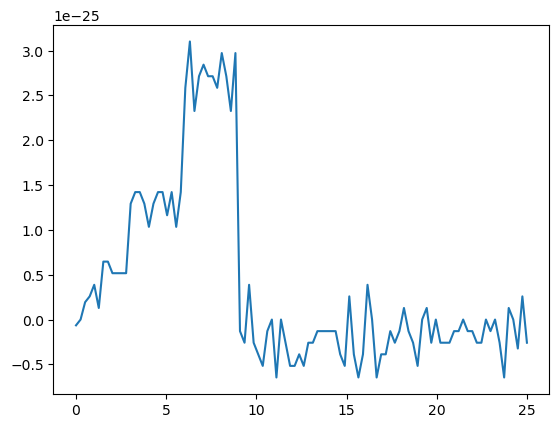

In [15]:
plt.figure
plt.plot(p3_vals, values)
plt.show